#Purpose

The purpose of this notebook is to serve as an introduction as to how neural networks work and to understand the math behind it with a hands-on example. There are definitely many ways to improve upon this so any suggestions would be greatly appreciated. :)

Authored by: Aneesh Nagalkar


# Introduction to Data


Our task is to take the data of the MNIST dataset and build and train a neural network that can recognize the digits that are drawn in this dataset from 0-9 with a relatively high accuracy. This notebook will walk you through the steps and the math involved in the construction of this network.

In order to work with the data, we must download the training data of our neural network from somewhere. I have split the training data into 3 separate files each around 25 MegaBytes large because github does not support the upload of 1 75 Megabyte

In [ ]:
import pandas as pd

# URLs of the CSV files
urls = [
    'https://raw.githubusercontent.com/aneesh-123/NeuralNetworkTutorial/main/train1.csv',
    'https://raw.githubusercontent.com/aneesh-123/NeuralNetworkTutorial/main/train2.csv',
    'https://raw.githubusercontent.com/aneesh-123/NeuralNetworkTutorial/main/train3.csv'
]

data1 = pd.read_csv(urls[0])
data2 = pd.read_csv(urls[1])
data3 = pd.read_csv(urls[2])
data = pd.concat([data1, data2, data3], axis=0, ignore_index=True)

Also to make it easy for later use in the notebook, I have also defined a function to display pictures via a Github url

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def display_github_image(url):
    # Construct the raw URL for the image
    image_url = url

    # Fetch the image
    response = requests.get(image_url)

    # Display the image
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

The first thing to do with a large dataset of course is to pass it
through and fully understand it! Below we do some preprocessing with the MNIST data. I recommend you download the csv file that [can be found here](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/input?select=train.csv) for further examination of how the data looks. It is a big file so it is fine to just view it in kaggle to get a general sense of the data.

In [ ]:
m,n = data.shape
print("there are ", m ," rows and ", n ," columns in this dataset")

NameError: name 'data' is not defined

Typically, there are 60,000 training samples in the MNIST training data but for the purposes of this lesson, the training dataset we are using has 42,000 examples (or rows). There are 785 columns in each row. The first column represents the correct annotated label of the example. This means that a human had manually gone over these 42,000 images and labeled the number that image represented from 0-9. The rest of the 784 columns represent the pixel values for each image (more on this in the next cell).

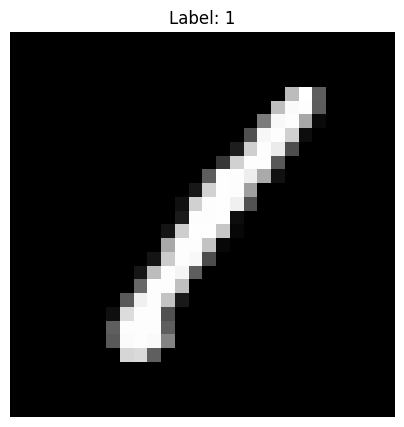

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Display the first image
image = data.iloc[0, 1:].values.reshape(28, 28)  # Reshape the first row (excluding the label) to 28x28
label = data.iloc[0, 0]  # Get the label for the first image

plt.figure(figsize=(5, 5))  # Set the figure size
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.title(f'Label: {label}')  # Set the title with the label
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Display the figure

This is a 28 by 28 pixel image, which means that there are 28 x 28 = 784 total pixels in this image. Each of these pixels are assigned a grayscale value of 0 to 255 with 0 being black and 255 being white. Below is the representation of this data element with the grayscale value of all 784 pixels printed out.

In [ ]:
# Display the first image
image = data.iloc[0, 1:].values.reshape(28, 28)  # Reshape the first row (excluding the label) to 28x28
label = data.iloc[0, 0]  # Get the label for the first image

# Print all 784 pixels in a horizontal line
print('All 784 pixels in a horizontal line:')
print(' '.join(map(str, data.iloc[0, 1:].values)))

# Print the data in a 28 x 28 format
print('\nData in 28 x 28 format:')
for row in image:
    print(' '.join(f"{val:3d}" for val in row))

All 784 pixels in a horizontal line:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 188 255 94 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 191 250 253 93 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 123 248 253 167 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 80 247 253 208 13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 29 207 253 235 77 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 54 209 253 253 88 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 93 254 253 238 170 17 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 23 210 254 253 159 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 16 209 253 254 240 81 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 27 253 253 254 13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 206 254 254 198 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 168 253 25

Before we perform any operations with the data, we must split it into training and testing data. The first 1000 examples of the shuffled data will be our development or validation dataset where the model's hyperparameters will be adjusted after training. Do not worry about this for now. The rest of the data will be used as our training set where we will train our neural network with this data. In this example, the matrices are also transposed, so now, each column represents a different image of 784 pixels. This is just to make it simpler to work with and manipulate the data

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

#transpose the data such that each column represents an image
data_dev = data[0:1000].T
#extracts the labels from this dev data
Y_dev = data_dev[0]
#each column represents an individual image of the 1000 sample number.
#Ex: Column 1 represents pixel 1 for each of the 1000 samples
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

#this data will be used to train the neural network. This one is important
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
#the values are divided by 255 (normalized) to make it easier for preprocessing.
#it is divided by 255 because the grayscale pixel values can be any number from 0 to 255
#so this ensures that the data will be some number from 0 to 1
X_train = X_train / 255.
_,m_train = X_train.shape

# Basic Concepts of Neural Networks Explained

## Perceptrons

Firstly, it is important to understand what a PERCEPTRON is. "A perceptron takes several binary inputs x1, x2, ..., and produces a single binary output." Essentially, it takes a few factors as inputs, accounts for their relative weights (or how important they are), and outputs a decision. Below is a simplified version of how it works.

There are certain qualitative factors that determine whether or not you go to the gym for example; the weather, time of day, your energy level. Each of these factors have some level of importance in determining whether or not you go to the gym. We can call this "importance level" the weights of our perceptron. Below is an example which represents factors affecting whether or not you should go to the gym along with their associated weights



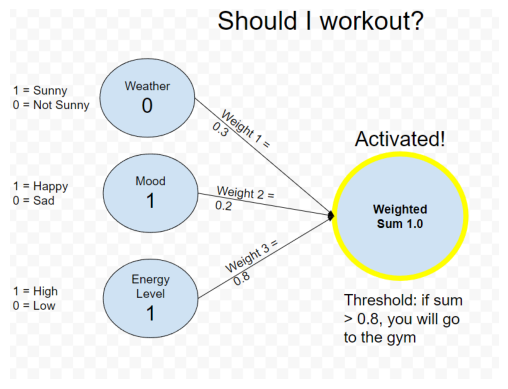

In [ ]:
display_github_image("https://github.com/aneesh-123/NeuralNetworkTutorial/blob/main/pictures/Perceptron.png?raw=true")

The output is binary (0 or 1). Generally speaking, the output can be represented by something like the below in algebraic terms. Since we are dealing with matrices, we simply use the dot product to simplify the expression. Don't worry if you don't understand how the dot product works, just know that this is our way to multiply two matrices.



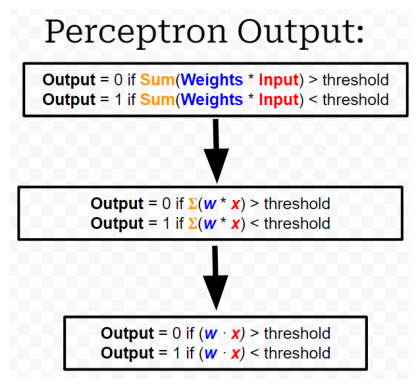

In [ ]:
display_github_image("https://github.com/aneesh-123/NeuralNetworkTutorial/blob/main/pictures/PerceptronMath.png?raw=true")

To simplify this even further, we can move the threshold over to the other side of the inequality. Instead of calling it a threshold, we can replace it with something called the bias. Bias = -threshold. Doing this greatly simplifies the equation and makes it much easier to read. Note: on the bottom-most inequalities, the threshold is just 0.

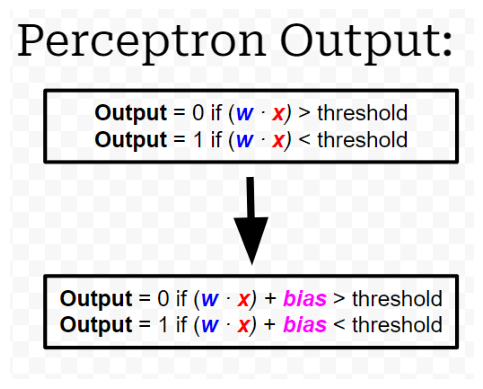

In [ ]:
display_github_image("https://github.com/aneesh-123/NeuralNetworkTutorial/blob/main/pictures/PerceptronSimplified.png?raw=true")

##Sigmoid Neurons

In an ideal neural network, if the model outputs "9" as its prediction when it should really be an "8", we should be able to change one of the weights of our perceptron to make this change. Unfortunately, because of the way perceptrons work, making this change will mess up the predictions for the other outputs and mess up the whole model. Below shows a graphical visualization of a perceptron to get a better idea.

The threshold is 0.5
Output when x is  0.4  :  0
Output when x is  0.45  :  0
Output when x is  0.5  :  0
Output when x is  0.55  :  1


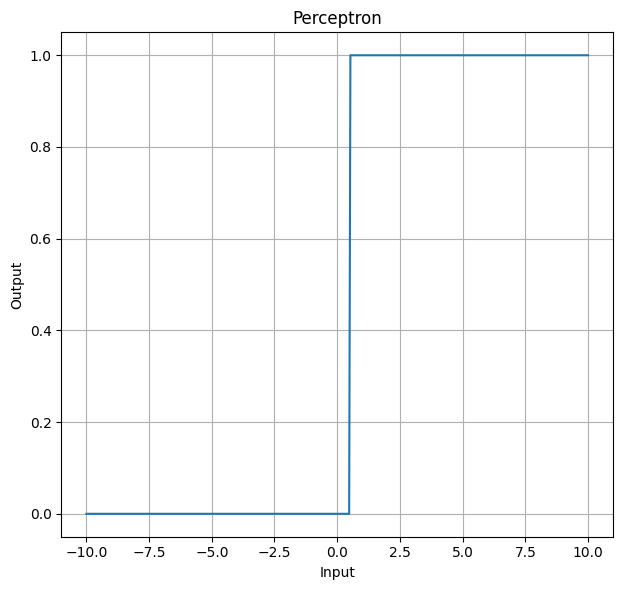

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Perceptron function
def perceptron(x, threshold=0.5):
    return 1 if x > threshold else 0

# Generate input values
x_values = np.linspace(-10, 10, 400)

# Calculate perceptron outputs
perceptron_outputs = [perceptron(x) for x in x_values]

print("The threshold is 0.5")
print("Output when x is ", 0.4, " : ", perceptron (0.4))
print("Output when x is ", 0.45, " : ", perceptron (0.45))
print("Output when x is ", 0.50, " : ", perceptron (0.50))
print("Output when x is ", 0.55, " : ", perceptron (0.55))


# Plotting the results
plt.figure(figsize=(12, 6))

# Perceptron plot
plt.subplot(1, 2, 1)
plt.plot(x_values, perceptron_outputs, label='Perceptron Output')
plt.title('Perceptron')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()

As you can see above. Making small changes to the input x does not result in a small, proportional change to the output. In essence, this perceptron basically acts like a light switch where 0 or 1 represents on or off. However, for our neural network, we would rather prefer a dimmer switch on the light where we can carefully control the brightness by adjusting the input. This would allow us to make a small change to the input and have a corresponding small change to the output.

Output when x is  0.4  :  0.598687660112452
Output when x is  0.45  :  0.610639233949222
Output when x is  0.5  :  0.6224593312018546
Output when x is  0.55  :  0.6341355910108007


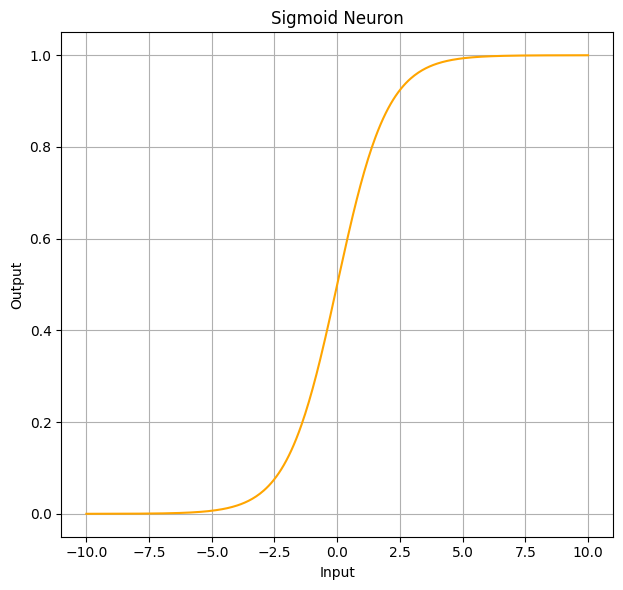

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate input values
x_values = np.linspace(-10, 10, 400)

# Calculate sigmoid outputs
sigmoid_outputs = sigmoid(x_values)

print("Output when x is ", 0.4, " : ", sigmoid(0.4))
print("Output when x is ", 0.45, " : ", sigmoid (0.45))
print("Output when x is ", 0.50, " : ", sigmoid (0.50))
print("Output when x is ", 0.55, " : ", sigmoid(0.55))

# Plotting the results
plt.figure(figsize=(12, 6))

# Sigmoid plot
plt.subplot(1, 2, 2)
plt.plot(x_values, sigmoid_outputs, label='Sigmoid Output', color='orange')
plt.title('Sigmoid Neuron')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()

As seen here, making small changes to the input result in small changes to the output. Thus, the sigmoid function introduces some non-linearity. The sigmoid function is not the only function that can do this; there are other activation functions that can do this job.

##Activation Functions

The sigmoid function explained earlier uses an activation function. This activation function takes in the inputs and it calculates whether that specific node (or neuron) is activated. For the purposes of this tutorial we will be using 2 activation functions described below

###Rectified Linear Unit (ReLU)

The ReLU activation function is very simple. If the input is positive, then the neuron is "on" and the output has a linear pattern as seen in the graph below. If the input is negative, then it simply defaults to 0 and this neuron is "off".

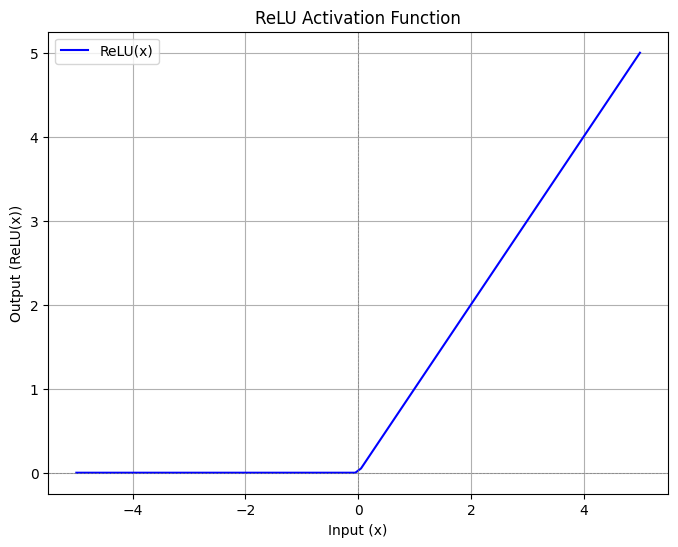

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Generate input data
x = np.linspace(-5, 5, 100)

# Apply ReLU activation function to the input data
y = relu(x)

# Plot the input data and the output of the ReLU activation function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU(x)', color='blue')
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.xlabel('Input (x)')
plt.ylabel('Output (ReLU(x))')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.legend()
plt.show()

###Softmax

In our model, the softmax function will be used at the very end to output the probability of the input image being any of the numbers from 0-9. For example, it could say there is a 10% probability of being 0, a 50% probability of being 1, a 5% probability of being 2, and so on until we reach a total of 100% for the numbers from 0-9.

Here is a quick example to outline this concept. In the example below, you are trying to decide what movie to watch and you consequently label each movie with a relative score of how much you would like to watch it. Your scores are inputted into a softmax function and the probabilities are calculated.

In [ ]:
import numpy as np

# Define the softmax function
def softmax(x):
    #np.exp(x) represents e^(x)
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores)

# Input scores representing movie preferences
input_scores = np.array([3.0, 1.0, 0.2])

# Calculate softmax probabilities
softmax_probs = softmax(input_scores)

print("Input Scores:", input_scores)
print("Softmax Probabilities:", softmax_probs)


Input Scores: [3.  1.  0.2]
Softmax Probabilities: [0.8360188  0.11314284 0.05083836]


Below is a graphical representation of these probabilities based on the given inputs. It is evident that the sum of the probabilities add up to 1, which shows that the softmax function effectively normalizes the data as well. The reason why softmax is used is because it normalizes the data, ensuring that all probabilties add to 1, and also because it ensures that we do not have to deal with negative numbers.

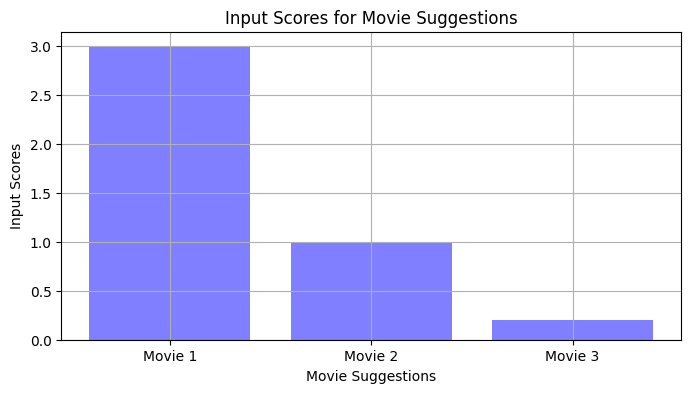

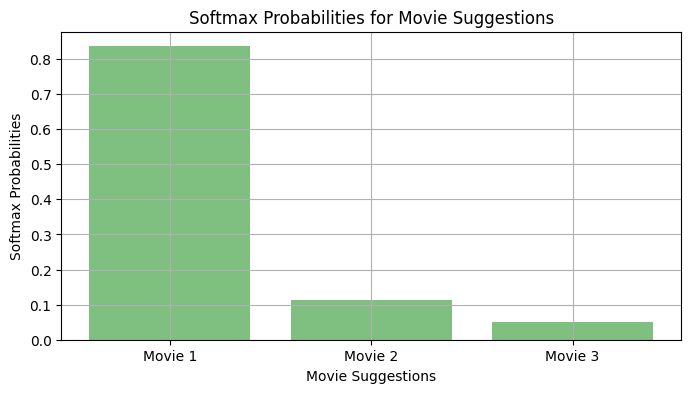

In [ ]:
import matplotlib.pyplot as plt

# Plot input scores
plt.figure(figsize=(8, 4))
plt.bar(range(len(input_scores)), input_scores, color='blue', alpha=0.5)
plt.xlabel('Movie Suggestions')
plt.ylabel('Input Scores')
plt.title('Input Scores for Movie Suggestions')
plt.xticks(range(len(input_scores)), ['Movie 1', 'Movie 2', 'Movie 3'])
plt.grid(True)
plt.show()

# Plot softmax probabilities
plt.figure(figsize=(8, 4))
plt.bar(range(len(softmax_probs)), softmax_probs, color='green', alpha=0.5)
plt.xlabel('Movie Suggestions')
plt.ylabel('Softmax Probabilities')
plt.title('Softmax Probabilities for Movie Suggestions')
plt.xticks(range(len(softmax_probs)), ['Movie 1', 'Movie 2', 'Movie 3'])
plt.grid(True)
plt.show()


##Architecture of Our Network

For the purposes of our MNIST digit classification, we will be using a neural network architecture with the following qualities:

784 nodes in the input layer (representing 784 pixels of the input image)

10 nodes in the hidden layer

ReLU activation function applied

10 nodes in the output layer

Softmax activation function applied

In [ ]:
display_github_image("https://github.com/aneesh-123/NeuralNetworkTutorial/blob/main/pictures/NNArch.png?raw=true")

NameError: name 'display_github_image' is not defined

#Initializing the Network

Recall in the previous sections, we defined a perceptron as the sum of its weights multiplied by its inputs. However, now that we rearranged the equation to account for a bias, a sample calculation of the perceptron plus its added bias can be seen below.

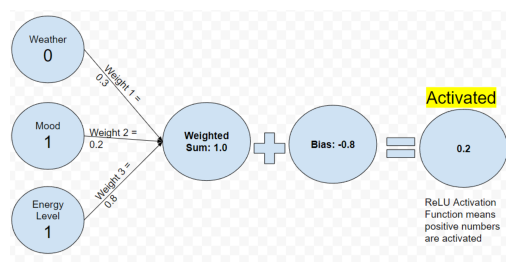

In [ ]:
display_github_image("https://github.com/aneesh-123/NeuralNetworkTutorial/blob/main/pictures/PerceptronIncludesBias.png?raw=true")

So in our example of the MNIST dataset, where there are 784 input pixels, what would be the total amount of weights and biases?

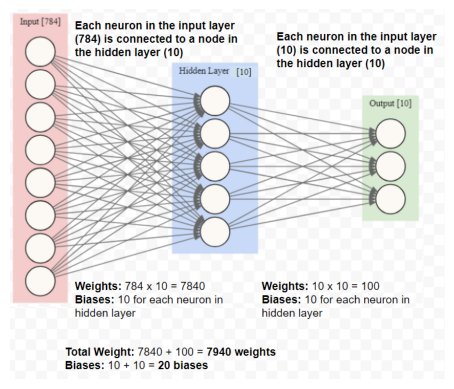

In [ ]:
display_github_image("https://github.com/aneesh-123/NeuralNetworkTutorial/blob/main/pictures/WeightsBiasesCalc.png?raw=true")

This is a lot of weights and biases, which makes sense considering the amount of connections. Essentially, the goal of training a neural network is to find the right weights and biases that would eventually output the correct value in the output layer. When starting to construct our neural network, we have to initialize our weights and biases to values. We can do this by simply assigning random values to every weight and bias of this network. The code to do so is below.

In [ ]:
def init_params():
    #The rand function chooses a random number from 0 to 1.
    #Subtracting by 0.5 ensures that the distribution is centered around 0
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

W1, b1, W2, b2 = init_params()
m,n = W1.shape
print("There are ", n, " neurons in the input layer and each of these connect to ", m, " neurons in the hidden layer" )
print(W1)

print("\n there are ", m, " neurons in the hidden layer and each of these have 1 bias")
print(b1)

m,n = W2.shape
print("\n There are ", n, " neurons in the hidden layer and each of these connect to ", m, " neurons in the output layer")
print(W2)

print("\n there are ", m, " neurons in the output layer and each these have 1 bias")
print(b2)

There are  784  neurons in the input layer and each of these connect to  10  neurons in the hidden layer
[[-0.22067616  0.48890939  0.08183617 ... -0.00116107 -0.34121164
  -0.35449256]
 [ 0.06692682  0.33737084  0.37123969 ...  0.05177138  0.43479594
  -0.47138466]
 [-0.38890412 -0.38064869 -0.14091954 ... -0.09696155  0.30436973
   0.46163802]
 ...
 [ 0.46948464  0.03220249  0.41398686 ...  0.42866499 -0.17111609
   0.43878849]
 [-0.35521663 -0.43389449  0.13808589 ...  0.39934201 -0.07772631
   0.42427111]
 [-0.13968324  0.41135064 -0.32709093 ...  0.17730605  0.40765891
   0.37662965]]

 there are  10  neurons in the hidden layer and each of these have 1 bias
[[ 0.22895004]
 [ 0.10425754]
 [ 0.14489747]
 [-0.41835932]
 [ 0.01018591]
 [ 0.47261674]
 [-0.32861769]
 [-0.25482453]
 [-0.02828061]
 [-0.43249707]]

 There are  10  neurons in the hidden layer and each of these connect to  10  neurons in the output layer
[[-0.45383833  0.28999856 -0.12116459 -0.43496292 -0.32473756 -0.17464

#Constructing the FeedForward network

Feedforward in the context of neural networks refers to the process of propagating the inputs through the network to compute the corresponding outputs. Following the architecture of the neural network described in the previous section, we feed one image into our neural network. There is a very high chance that the output prediction of this network will be wrong because we have picked random weights and biases. In the tutorial that follows, we will craft an algorithm to find the right weights and biases that will allow us to classify the right digits.

In [ ]:
def forward_prop_one_example(W1, b1, W2, b2, X):
    #Refer to the "Architecture of Our Network" section if you do not understand why we are doing this
    #applying the dot product is our way of multiplying two matrices together
    Z1 = W1.dot(X) + b1.flatten()
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2.flatten()
    A2 = softmax(Z2)
    predictions = get_predictions(A2)
    return Z1, A1, Z2, A2, predictions

def get_predictions(A2):
    return np.argmax(A2)

#first randomly initialize the weights and biases of the neural network
W1, b1, W2, b2 = init_params()

#get all 784 pixels for the first input
first_example = X_train[:, 0]

#feed the 784 pixel input of the first example into the neural network once
Z1, A1, Z2, A2, predictions = forward_prop_one_example(W1, b1, W2, b2, first_example)

print("Prediction for the first example:", predictions)
print("Actual label for the first example:", Y_train[0])


Prediction for the first example: 5
Actual label for the first example: 3
